# Our first predictive model!

One of the powerful ways we use python and pandas is the ease with which we can build powerful predictive models.  The structure follows a basic structure that can be reused to fit many different types of models.   

Lets use a standard data set on features of different cars  to build a simple model to predict the mpg of cars (Y) from the other data available on those cars (X).

In [3]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels as sm

# this trick is required to get plots to display inline with the rest of your notebook,
# not in a separate window
%matplotlib inline

### EDA and preparing the data for modelling

Recall `College.csv` - download again to your local machine if needed by [clicking on this link](https://www.statlearning.com/s/College.csv).

This is a data set from US News and World Report with features from many US universities.  The feature list description [can be found at this link](https://intro-stat-learning.github.io/ISLP/datasets/College.html).

In [20]:
#import the data into a Pandas data frame:
college_df = pd.read_csv("College.csv", index_col=0)

In [ ]:
# Let's rename all of the columns to remove punctuation (PET PEEVE ALERT)
# good use for Gen AI!!

In [21]:
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [22]:
college_df.columns = college_df.columns.str.replace('.', '')

In [23]:
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


We want to fit a model predicting `GradRate` based on the other features of the college.  

Some pre-processing we need to do..any categorical features need to be "dummy-fied" by transforming into numerical (0,1) dummy variables.  Lets do this for `Private` by using the function `get_dummies` from `Pandas`.



In [24]:
college_df = pd.get_dummies(college_df, columns=['Private'], prefix=['Private'], drop_first=True)

In [25]:
college_df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate,Private_Yes
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,True
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,True
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,True
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,True


Lets use `describe()` to make sure all of our features are what we expect them to be.

In [26]:
college_df.describe().round(2)

,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate
count,777.00,777.00,777.00,777.00,777.0,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00,777.00
mean,3001.64,2018.80,779.97,27.56,55.8,3699.91,855.30,10440.67,4357.53,549.38,1340.64,72.66,79.70,14.09,22.74,9660.17,65.46
std,3870.20,2451.11,929.18,17.64,19.8,4850.42,1522.43,4023.02,1096.70,165.11,677.07,16.33,14.72,3.96,12.39,5221.77,17.18
min,81.00,72.00,35.00,1.00,9.0,139.00,1.00,2340.00,1780.00,96.00,250.00,8.00,24.00,2.50,0.00,3186.00,10.00
25%,776.00,604.00,242.00,15.00,41.0,992.00,95.00,7320.00,3597.00,470.00,850.00,62.00,71.00,11.50,13.00,6751.00,53.00
50%,1558.00,1110.00,434.00,23.00,54.0,1707.00,353.00,9990.00,4200.00,500.00,1200.00,75.00,82.00,13.60,21.00,8377.00,65.00
75%,3624.00,2424.00,902.00,35.00,69.0,4005.00,967.00,12925.00,5050.00,600.00,1700.00,85.00,92.00,16.50,31.00,10830.00,78.00
max,48094.00,26330.00,6392.00,96.00,100.0,31643.00,21836.00,21700.00,8124.00,2340.00,6800.00,103.00,100.00,39.80,64.00,56233.00,118.00


Hmm...seems to be an outlier in GradRate, which should be between 0 and 100...

In [27]:
# prompt: check for GradRate greater than 100 or less than 0

college_df[(college_df['GradRate'] > 100) | (college_df['GradRate'] < 0)]


,Apps,Accept,Enroll,Top10perc,Top25perc,FUndergrad,PUndergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SFRatio,percalumni,Expend,GradRate,Private_Yes
Cazenovia College,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,True


In [28]:
# lets remove the bad columns

bad_cols = (college_df['GradRate'] > 100) | (college_df['GradRate'] < 0)
college_df = college_df[~bad_cols]


In [31]:
# Now define our X and y, what are we predicting and what are the features?

# the features are going to be everything other than GradRate
print(list(college_df.columns))
X_features = list(college_df.columns)
X_features.remove("GradRate")
print(X_features)
# our target is GradRate

target = "GradRate"

# For readability, identify your X (predictors) and y (target) variable cleanly
X = college_df[X_features]
y = college_df[target]
print(X.head())
print(y.head())


['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'FUndergrad', 'PUndergrad', 'Outstate', 'RoomBoard', 'Books', 'Personal', 'PhD', 'Terminal', 'SFRatio', 'percalumni', 'Expend', 'GradRate', 'Private_Yes']
['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'FUndergrad', 'PUndergrad', 'Outstate', 'RoomBoard', 'Books', 'Personal', 'PhD', 'Terminal', 'SFRatio', 'percalumni', 'Expend', 'Private_Yes']


**Is this a classification or regression task??**

Remember about defining Training and Test sets.  The Training set is used to fit the model and then that model is applied to the Test set to see how good the predictions are.  
- Split data into 80% training and 20% test sets
- Fit the model to the training data to optimize parameters

In [44]:
# Split data into training and test sets

# need to import the `train_test_split` module

# Use random_state if you want the same random split every time

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)


### Fitting a Linear Regression model




In [45]:
# First we'll need to import the predictive model class that we'll use

from sklearn.linear_model import LinearRegression

# Instantiate the model
my_model = LinearRegression()

# fit the regression model to the TRAINING DATA
my_model.fit(X_train,y_train)


LinearRegression()

In [46]:
# print the coefficients from the model

print(pd.DataFrame({'Predictor':X_train.columns, 'coefficient':my_model.coef_.round(3)}))

      Predictor  coefficient
0          Apps        0.001
1        Accept       -0.001
2        Enroll        0.003
3     Top10perc        0.052
4     Top25perc        0.124
5    FUndergrad       -0.000
6    PUndergrad       -0.001
7      Outstate        0.001
8     RoomBoard        0.001
9         Books       -0.003
10     Personal       -0.001
11          PhD        0.099
12     Terminal       -0.084
13      SFRatio        0.113
14   percalumni        0.239
15       Expend       -0.000
16  Private_Yes        2.765


## Evaluating the Model

That's it!  This same structure applies to all data science models and now you can fit some of the most powerful models out there with this simple code! 💪 💻

Now we get to see how well the model performs.  One way to do evaluation is to numerically compare the predictions ON THE TEST SET to the actual values in the test set.

This is a regression problem so our predictions are numeric.  We can compare the prediction and the actual using mean absolute error (MAE) or root mean squared error (RMSE).

 [There are many other metrics available too!](https://scikit-learn.org/stable/modules/model_evaluation.html#)

In [47]:
# Calclate the model predictions as applied to the TEST set
y_pred = my_model.predict(X_test)


# Print the first 10 values in y_pred and y_test next to each other
predictions_df = pd.DataFrame({'Pred': y_pred.round(1), 'Truth': y_test})
print(predictions_df.head(10))


                                Pred  Truth
Northwest Nazarene College      64.7     58
Georgetown College              65.0     55
San Diego State University      53.6     41
Dominican College of Blauvelt   53.4     54
University of Chicago           83.3     90
Ohio University                 61.6     64
Christopher Newport University  54.7     48
Elmira College                  72.9     64
Hampton University              64.0     70
Seton Hill College              69.3     71


In [48]:
# Calculate RMSE directly using Numpy

pred_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print("RMSE:", pred_rmse.round(2))

# PET PEEVE TRIGGER ALERT - DIGITS!!


RMSE: 12.07


**IMPORTANT: Interpret your RMSE in the context of the problem**.  What does it mean in words?

We can instead use `sklearn.metrics` to calculate evaluation metrics directly.


In [49]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", round(rmse,2))

mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", round(mae,3))

r_squared = r2_score(y_test, y_pred)
print("R-squared=",round(r_squared,3))

RMSE: 12.07
Mean absolute error: 9.036
R-squared= 0.503


Note: $R^2$ is **not** a very good metric to use for predictive tasks.  Why?

What if you were to calculate RMSE on the training set? Do you think it would be higher or lower?

In [51]:
# Calculate RMSE directly using Numpy

# Calculate predictions on the training set
y_train_pred = my_model.predict(X_train)

# Calculate RMSE on the training set
rmse_training = root_mean_squared_error(y_train, y_train_pred)
print("Training RMSE:", round(rmse_training,2))

Training RMSE: 12.59


You will be using and amending this basic code MANY times this semester!

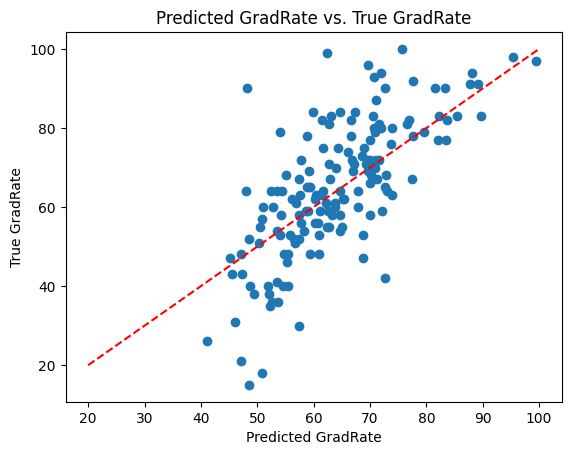

In [54]:
# Can we visualize how good our predictions are?
# Let's plot the predicted mpg vs. the true value

plt.scatter(y_pred, y_test) # PET PEEVE TRIGGER ALERT
plt.xlabel("Predicted GradRate")
plt.ylabel("True GradRate")
plt.title("Predicted GradRate vs. True GradRate")
# plot x=y line on plot
plt.plot([20, 100], [20, 100], 'r--')
plt.show()


### Optional Class Exercises: EDA and Modelling



1. Use the pd.plotting.scatter_matrix() function to produce a scatterplot matrix of any 3 numeric features and your Target [Apps, Accept, Enroll, Top10perc, GradRate].  What do you learn?

2. Use the boxplot() method to produce side-by-side boxplots of GradRate for Private=Yes vs Private=No. What do you learn?

3. We might be intersted in studying Elite schools, where Elite is defined by whether the school has more than 50% of their students from the top 10% of their class (Top10perc).  Create a new feature, called Elite, by binning the Top10perc variable into two groups based on whether or not the proportion of students coming from the top 10% of their high school classes exceeds 50%. How many Elite colleges are there and do Elite colleges have a higher or lower graduation rate?

4. Recreate the AcceptPerc feature (Accepted divided by Apps).  Add this as a new feature to the regression above.  Did the model get any better?  

5. Fit another model!  It is as simple as changing the first line of code `my_model` and using another type of model (as long as that model has been imported.  For instance, replace above with:

  `from sklearn.tree import DecisionTreeRegressor`

  `my_model = DecisionTreeRegressor(max_depth=3)`

  everything after that can remain the same!
